In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

In [15]:
data = pd.read_csv('data/CommViolPredUnnormalizedData.csv', na_values=["?"])
data.head()

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39.0,5320.0,1,11980,3.10,1.37,91.78,6.50,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,PA,45.0,47616.0,1,23123,2.82,0.80,95.57,3.44,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,1,29344,2.43,0.74,94.33,3.43,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,Gloversvillecity,NY,35.0,29443.0,1,16656,2.40,1.70,97.35,0.50,...,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN
4,Bemidjicity,MN,7.0,5068.0,1,11245,2.76,0.53,89.16,1.17,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,NaN,9988.79


In [17]:
data.drop(['communityname','state', 'countyCode', 'communityCode', 'fold'], axis=1, inplace=True)

ValueError: labels ['communityname' 'state' 'countyCode' 'communityCode' 'fold'] not contained in axis

In [18]:
data.isnull().sum()

population                0
householdsize             0
racepctblack              0
racePctWhite              0
racePctAsian              0
racePctHisp               0
agePct12t21               0
agePct12t29               0
agePct16t24               0
agePct65up                0
numbUrban                 0
pctUrban                  0
medIncome                 0
pctWWage                  0
pctWFarmSelf              0
pctWInvInc                0
pctWSocSec                0
pctWPubAsst               0
pctWRetire                0
medFamInc                 0
perCapInc                 0
whitePerCap               0
blackPerCap               0
indianPerCap              0
AsianPerCap               0
OtherPerCap               1
HispPerCap                0
NumUnderPov               0
PctPopUnderPov            0
PctLess9thGrade           0
                       ... 
OfficAssgnDrugUnits    1872
NumKindsDrugsSeiz      1872
PolicAveOTWorked       1872
LandArea                  0
PopDens             

In [19]:
features_columns = ['pctWPubAsst', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 
                    'PctBSorMore',  'PctUnemployed', 'PctEmploy', 'TotalPctDiv', 
                    'PctFam2Par', 'PctImmigRecent' , 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 
                    'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousOwnOcc', 'PctVacMore6Mos', 
                    'PctForeignBorn', 'PctYoungKids2Par', 'PctOccupMgmtProf', 'PersPerOwnOccHous',
                    'PctPersOwnOccup','nonViolPerPop']
custom = data[features_columns]          

In [20]:
custom.isnull().sum()

pctWPubAsst             0
PctPopUnderPov          0
PctLess9thGrade         0
PctNotHSGrad            0
PctBSorMore             0
PctUnemployed           0
PctEmploy               0
TotalPctDiv             0
PctFam2Par              0
PctImmigRecent          0
PctSpeakEnglOnly        0
PctNotSpeakEnglWell     0
PctPersOwnOccup         0
PctPersDenseHous        0
PctHousOwnOcc           0
PctVacMore6Mos          0
PctForeignBorn          0
PctYoungKids2Par        0
PctOccupMgmtProf        0
PersPerOwnOccHous       0
PctPersOwnOccup         0
nonViolPerPop          97
dtype: int64

In [21]:
# horizontal drop na from nonViolPerPop
custom = custom[~custom.nonViolPerPop.isnull()]

In [22]:
custom.isnull().sum()

pctWPubAsst            0
PctPopUnderPov         0
PctLess9thGrade        0
PctNotHSGrad           0
PctBSorMore            0
PctUnemployed          0
PctEmploy              0
TotalPctDiv            0
PctFam2Par             0
PctImmigRecent         0
PctSpeakEnglOnly       0
PctNotSpeakEnglWell    0
PctPersOwnOccup        0
PctPersDenseHous       0
PctHousOwnOcc          0
PctVacMore6Mos         0
PctForeignBorn         0
PctYoungKids2Par       0
PctOccupMgmtProf       0
PersPerOwnOccHous      0
PctPersOwnOccup        0
nonViolPerPop          0
dtype: int64

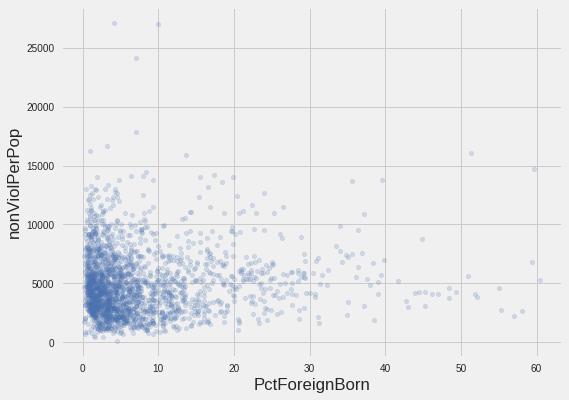

In [23]:
# Pandas scatterplot
custom.plot(kind='scatter', x='PctForeignBorn', y='nonViolPerPop', alpha=0.2);

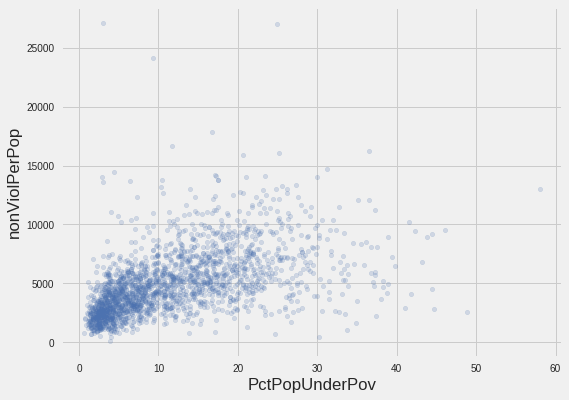

In [24]:
custom.plot(kind='scatter', x='PctPopUnderPov', y='nonViolPerPop', alpha=0.2);

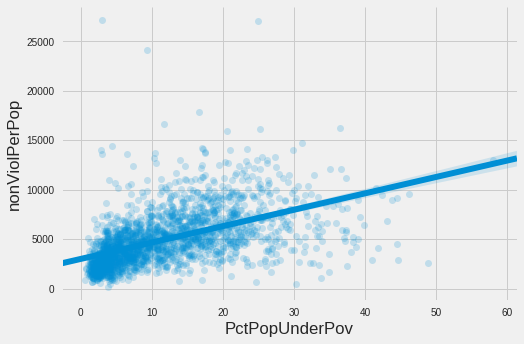

In [25]:
# Seaborn scatterplot with regression line# Seabo 
sns.lmplot(x='PctPopUnderPov', y='nonViolPerPop', data=custom, aspect=1.5, scatter_kws={'alpha':0.2});

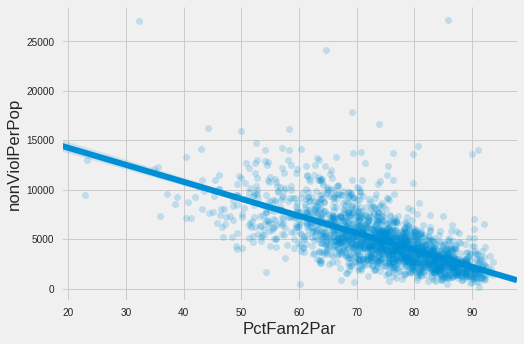

In [26]:
# Seaborn scatterplot with regression line# Seabo 
sns.lmplot(x='PctFam2Par', y='nonViolPerPop', data=custom, aspect=1.5, scatter_kws={'alpha':0.2});

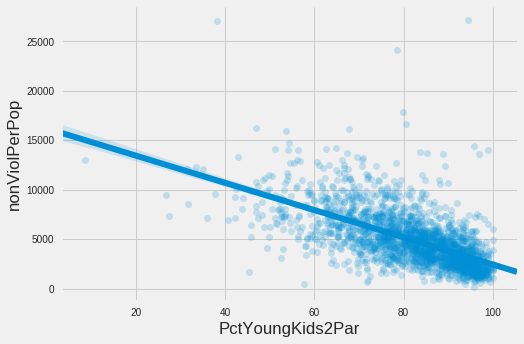

In [28]:
# Seaborn scatterplot with regression line# Seabo 
sns.lmplot(x='PctYoungKids2Par', y='nonViolPerPop', data=custom, aspect=1.5, scatter_kws={'alpha':0.2});

In [33]:
features_columns[21:]

['nonViolPerPop']

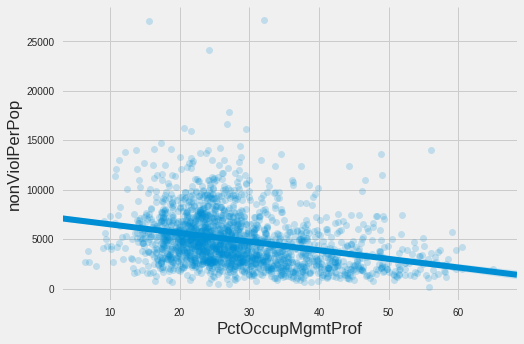

In [37]:
# Seaborn scatterplot with regression line# Seabo 
sns.lmplot(x='PctOccupMgmtProf', y='nonViolPerPop', data=custom, aspect=1.5, scatter_kws={'alpha':0.2});

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
feature_cols = ['PctFam2Par']
X = custom[feature_cols]
y = custom['nonViolPerPop']
print((X.shape))
print((y.shape))

(2118, 1)
(2118,)


In [39]:
lr.fit(X, y)
lr.predict(np.array([0]).reshape(1,-1))
# X_new = [[0], [10]]
# lr.predict(X_new)
print(lr.intercept_)
print(lr.coef_)

17682.8702088
[-172.20349429]


In [24]:
# custom.drop(['PctPolicWhite','pol_pct_ethnic'], axis=1, inplace=True)

/home/gomez/anaconda3/envs/ga_data_fun/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [25]:
custom.columns

Index(['pctWPubAsst', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad',
       'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'TotalPctDiv',
       'PctFam2Par', 'PctImmigRecent', 'PctSpeakEnglOnly',
       'PctNotSpeakEnglWell', 'PctPersOwnOccup', 'PctPersDenseHous',
       'PctHousOwnOcc', 'PctVacMore6Mos', 'PctForeignBorn'],
      dtype='object')

In [26]:
custom.isnull().sum()

pctWPubAsst            0
PctPopUnderPov         0
PctLess9thGrade        0
PctNotHSGrad           0
PctBSorMore            0
PctUnemployed          0
PctEmploy              0
TotalPctDiv            0
PctFam2Par             0
PctImmigRecent         0
PctSpeakEnglOnly       0
PctNotSpeakEnglWell    0
PctPersOwnOccup        0
PctPersDenseHous       0
PctHousOwnOcc          0
PctVacMore6Mos         0
PctForeignBorn         0
dtype: int64

In [28]:
custom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 17 columns):
pctWPubAsst            2215 non-null float64
PctPopUnderPov         2215 non-null float64
PctLess9thGrade        2215 non-null float64
PctNotHSGrad           2215 non-null float64
PctBSorMore            2215 non-null float64
PctUnemployed          2215 non-null float64
PctEmploy              2215 non-null float64
TotalPctDiv            2215 non-null float64
PctFam2Par             2215 non-null float64
PctImmigRecent         2215 non-null float64
PctSpeakEnglOnly       2215 non-null float64
PctNotSpeakEnglWell    2215 non-null float64
PctPersOwnOccup        2215 non-null float64
PctPersDenseHous       2215 non-null float64
PctHousOwnOcc          2215 non-null float64
PctVacMore6Mos         2215 non-null float64
PctForeignBorn         2215 non-null float64
dtypes: float64(17)
memory usage: 294.3 KB
